In [1]:
#Load Packages
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#Import csv file and create data frame
#df = pd.read_csv(Path('..Resources/SP500&Gas.csv'))
#pd.read_csv('SP500 & Gas',encoding = "utf-8")
#kwds.update(kwds_defaults)
#return _read(r"C:\Users\lmeji\Desktop\Project_branch\Investing_Analysis\Resources\SP500&Gas.csv", kwds)
data = Path(r"C:\Users\lmeji\Desktop\Project_branch\Investing_Analysis\Resources\SP500&Gas_updated.csv")
data_df = pd.read_csv(data)
data_df.head()

,Week,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
0,44781,215674,4155.93,4186.62,4128.97,4140.06,3604650000,4140.06,4.038
1,44774,220316,4112.38,4144.95,4096.02,4118.63,3540960000,4118.63,4.192
2,44767,225294,3965.72,3975.30,3943.46,3966.84,2988650000,3966.84,4.330
3,44760,225131,3883.79,3902.44,3818.63,3830.85,3414470000,3830.85,4.490
4,44753,228435,3880.94,3880.94,3847.22,3854.43,3023830000,3854.43,4.646


In [3]:
#Double check the data shape
#this is help to understand if we are dealing with a long (more rows than columns) or wide set (more columns than rows)

print(data_df.shape)

(1068, 9)


In [4]:
#Check out the data types: this could reveal additonal conversions that might need to happen 

data_df.dtypes

Week                      int64
Gasoline_stock_price      int64
GSPC_Open               float64
GSPC_High               float64
GSPC_Low                float64
GSPC_Close              float64
GSPC_Volume               int64
GSPC_Adjusted           float64
Gas_Price               float64
dtype: object

In [5]:
#Remove rows that have at least 1 null value.

new_data = data_df.dropna()

#Check the dataset shape and head to make sure the nulls were removed

print(new_data.shape)

new_data.head()

(1068, 9)


,Week,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
0,44781,215674,4155.93,4186.62,4128.97,4140.06,3604650000,4140.06,4.038
1,44774,220316,4112.38,4144.95,4096.02,4118.63,3540960000,4118.63,4.192
2,44767,225294,3965.72,3975.30,3943.46,3966.84,2988650000,3966.84,4.330
3,44760,225131,3883.79,3902.44,3818.63,3830.85,3414470000,3830.85,4.490
4,44753,228435,3880.94,3880.94,3847.22,3854.43,3023830000,3854.43,4.646


In [6]:
new_data.head(20)

,Week,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,GSPC_Volume,GSPC_Adjusted,Gas_Price
0,44781,215674,4155.93,4186.62,4128.97,4140.06,3604650000,4140.06,4.038
1,44774,220316,4112.38,4144.95,4096.02,4118.63,3540960000,4118.63,4.192
2,44767,225294,3965.72,3975.30,3943.46,3966.84,2988650000,3966.84,4.330
3,44760,225131,3883.79,3902.44,3818.63,3830.85,3414470000,3830.85,4.490
4,44753,228435,3880.94,3880.94,3847.22,3854.43,3023830000,3854.43,4.646
5,44739,219112,3920.76,3927.72,3889.66,3900.11,3385120000,3900.11,4.872
6,44725,218963,3838.15,3838.15,3734.30,3749.63,4572820000,3749.63,5.006
7,44718,217474,4134.72,4168.78,4109.18,4121.43,3852050000,4121.43,4.876
8,44704,218996,3919.42,3981.88,3909.04,3973.75,3392770000,3973.75,4.593
9,44697,219707,4013.02,4046.46,3983.99,4008.01,3824320000,4008.01,4.491


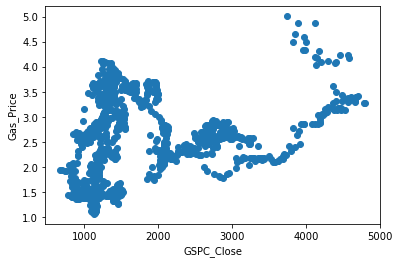

In [7]:
plt.scatter(new_data.GSPC_Close, new_data.Gas_Price)
plt.xlabel('GSPC_Close')
plt.ylabel('Gas_Price')
plt.show()

In [9]:
# Define the features set.
X = new_data.copy()
X = X.drop("GSPC_Close", axis=1)
X.head()

,Week,Gasoline_stock_price,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Volume,GSPC_Adjusted,Gas_Price
0,44781,215674,4155.93,4186.62,4128.97,3604650000,4140.06,4.038
1,44774,220316,4112.38,4144.95,4096.02,3540960000,4118.63,4.192
2,44767,225294,3965.72,3975.30,3943.46,2988650000,3966.84,4.330
3,44760,225131,3883.79,3902.44,3818.63,3414470000,3830.85,4.490
4,44753,228435,3880.94,3880.94,3847.22,3023830000,3854.43,4.646


In [10]:
# Define the target set.
y = new_data["GSPC_Close"].ravel()
y[:5]

array([4140.06, 4118.63, 3966.84, 3830.85, 3854.43])

In [23]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
#RANDOM FOREST
# Create a random forest classifier.
from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1) 

In [31]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

ValueError: Unknown label type: 'continuous'

In [28]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

NameError: name 'predictions' is not defined

In [27]:
# Calculated the balanced accuracy score


y_pred = rf_model.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

C:\Users\lmeji\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


AttributeError: 'RandomForestClassifier' object has no attribute 'n_classes_'

In [16]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


NameError: name 'cm_df' is not defined

In [17]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [18]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'